# Route Optimisation Algorithm Demonstration

## What this demo covers
This demo showcases some basic variants of the TSP problem. *Important call out*: many real-life applications may not be able to lean on the Google OR Tools library since they may have some incredibly specific constraints, so it may be a case of needing to do some extra bespoke development which will lengthen the delivery cycle. 

In [1]:
import math
import numpy as np
import pandas as pd
from call_funcs import data_generator, distance_finder
from problem_solver import problem_solver
from route_operations import route_cleaner, fetch_route_detail
from plotting_helper import plot_routes
from multi_depot_solver import multi_depot_solver

## First Example: simple case - one depot, multiple drivers

This is a relatively simple example, where we just look at getting some drivers from a certain start point to cover a set of calls; no thought towards even distribution of work, etc

In [2]:
engineers = 3
jobs = 12
time_limit = 10

In [3]:
call_locations = data_generator(jobs,200,200)
distance_matrix = distance_finder(call_locations)

In [4]:
call_locations

,index,x,y
0,0,28,140
1,1,47,107
2,2,38,171
3,3,9,179
4,4,187,106
5,5,155,142
6,6,84,145
7,7,2,95
8,8,66,124
9,9,163,125


In [5]:
distance_matrix

[[0, 38, 32, 43, 162, 127, 56, 51, 41, 135, 103, 141],
 [38, 0, 64, 81, 140, 113, 53, 46, 25, 117, 86, 119],
 [32, 64, 0, 30, 162, 120, 52, 84, 54, 133, 102, 141],
 [43, 81, 30, 0, 192, 150, 82, 84, 79, 163, 132, 171],
 [162, 140, 162, 192, 0, 48, 110, 185, 122, 30, 59, 21],
 [127, 113, 120, 150, 48, 0, 71, 160, 90, 18, 28, 33],
 [56, 53, 52, 82, 110, 71, 0, 96, 27, 81, 50, 89],
 [51, 46, 84, 84, 185, 160, 96, 0, 70, 163, 132, 164],
 [41, 25, 54, 79, 122, 90, 27, 70, 0, 97, 65, 100],
 [135, 117, 133, 163, 30, 18, 81, 163, 97, 0, 32, 15],
 [103, 86, 102, 132, 59, 28, 50, 132, 65, 32, 0, 38],
 [141, 119, 141, 171, 21, 33, 89, 164, 100, 15, 38, 0]]

In [6]:
routes = problem_solver(distance_matrix, engineers)

Route for vehicle 0:
 0 ->  2 ->  3 ->  7 -> 0
Distance of the route: 197m

Route for vehicle 1:
 0 ->  6 ->  5 ->  9 ->  1 -> 0
Distance of the route: 300m

Route for vehicle 2:
 0 ->  8 ->  11 ->  4 ->  10 -> 0
Distance of the route: 324m

Distance travelled:  821


In [7]:
clean_routes = route_cleaner(routes, jobs, True)
routes_data = fetch_route_detail(clean_routes, call_locations)
routes_data

,index,x_coord,y_coord,driver,order
0,0,28,140,0,0
1,2,38,171,0,1
2,3,9,179,0,2
3,7,2,95,0,3
4,0,28,140,1,0
5,6,84,145,1,1
6,5,155,142,1,2
7,9,163,125,1,3
8,1,47,107,1,4
9,0,28,140,2,0


c:\Demos\02. UKPN Revised Demo\plotting_helper.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  driver_df = driver_df.append(driver_df.iloc[0,:])
c:\Demos\02. UKPN Revised Demo\plotting_helper.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  driver_df = driver_df.append(driver_df.iloc[0,:])
c:\Demos\02. UKPN Revised Demo\plotting_helper.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  driver_df = driver_df.append(driver_df.iloc[0,:])


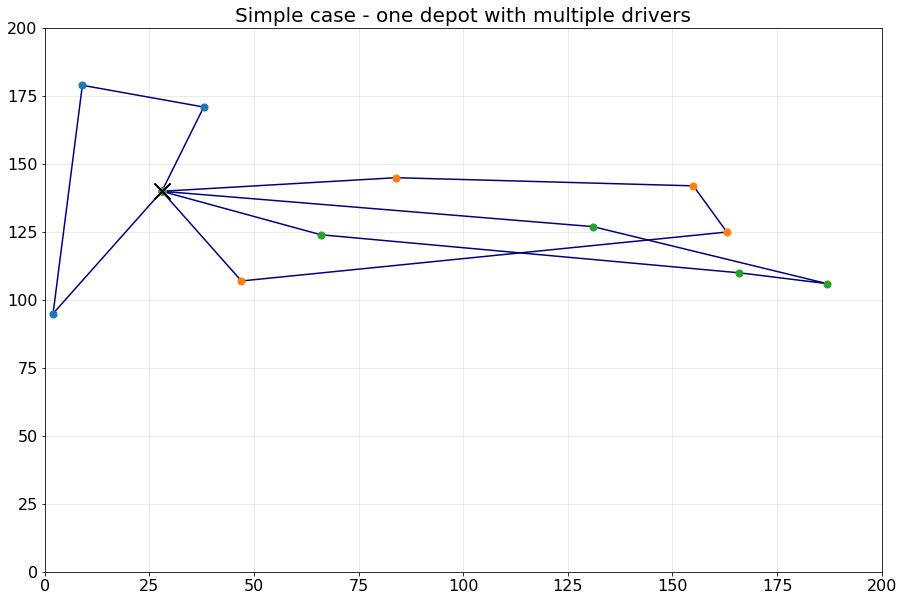

In [8]:
plot_routes(routes_data, 'Simple case - one depot with multiple drivers')

## Second Example: Multiple start points, even distribution of work

In this example, each crew starts from a different place, and all crews must perform the same number of repairs/jobs/callouts.

In [9]:
engineers = 3
jobs = 12
time_limit = 10
call_locations = data_generator(jobs,200,200)
distance_matrix = distance_finder(call_locations)

In [10]:
multi_depot_routes = multi_depot_solver(distance_matrix, engineers)
multi_depot_routes

Route for vehicle 0:
 7 ->  2 ->  4 ->  3 -> 7
Distance of the route: 164m

Route for vehicle 1:
 11 ->  5 ->  6 ->  1 ->  9 ->  10 -> 11
Distance of the route: 234m

Route for vehicle 2:
 0 ->  8 -> 0
Distance of the route: 246m

Distance travelled:  644


[[7, 2, 4, 3], [11, 5, 6, 1, 9, 10], [0, 8]]